In [2]:
import xarray as xr
# import climetlab as cml
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [63]:
path = "/mnt/V/Master/data/"
# path = "/mnt/qb/goswami/data/era5/single_pressure_level/"
ds = xr.open_dataset(path + "sea_surface_temperature/sea_surface_temperature_2019.nc")
# sst = ds.sel(time="2019-01-01T00:00").sel(dict(longitude=slice(0,100))).where((ds.latitude > 72) & (ds.latitude < 80)).to_array()[0]
sst = ds.sel(time="2019-01-01T00:00").sel(dict(longitude=slice(270,300),latitude=slice(50.,20))).to_array()[0]
sst_2 = ds.sel(time="2019-01-01T00:00").sel(dict(longitude=slice(270,300),latitude=slice(50.,20))).coarsen(latitude=2,longitude=2,boundary='trim').mean().to_array()[0]
sst_4 = ds.sel(time="2019-01-01T00:00").sel(dict(longitude=slice(270,300),latitude=slice(50.,20))).coarsen(latitude=2,longitude=2,boundary='trim').mean().to_array()[0]

sst_8 = ds.sel(time="2019-01-01T00:00").sel(dict(longitude=slice(270,300),latitude=slice(50.,20))).coarsen(latitude=8,longitude=8,boundary='trim').mean().to_array()[0]


In [64]:
sst

<xarray.DataArray (latitude: 121, longitude: 121)>
array([[      nan,       nan,       nan, ..., 272.84186, 272.63785,
        272.4599 ],
       [      nan,       nan,       nan, ..., 272.96198, 273.00012,
        272.85266],
       [      nan,       nan,       nan, ..., 273.24734, 273.28546,
        273.37   ],
       ...,
       [      nan,       nan,       nan, ..., 299.43558, 299.4286 ,
        299.40445],
       [      nan,       nan,       nan, ..., 299.4502 , 299.454  ,
        299.45593],
       [      nan,       nan,       nan, ..., 299.47754, 299.49216,
        299.48834]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 270.0 270.2 270.5 270.8 ... 299.5 299.8 300.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2019-01-01
    variable   <U3 'sst'
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-20 12:42:25 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

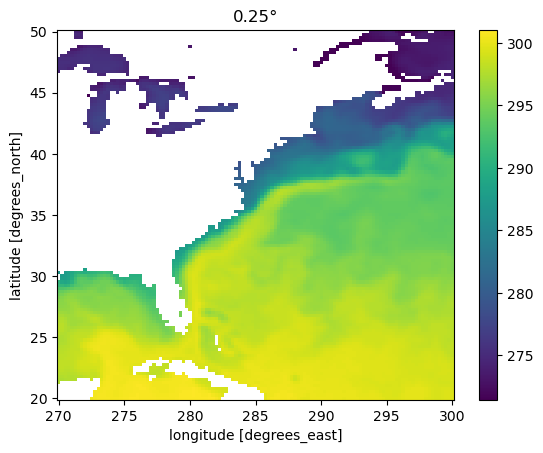

In [73]:
sst.plot()
plt.title("0.25°")
plt.savefig("/mnt/V/Master/figures/sst_0.25.png")

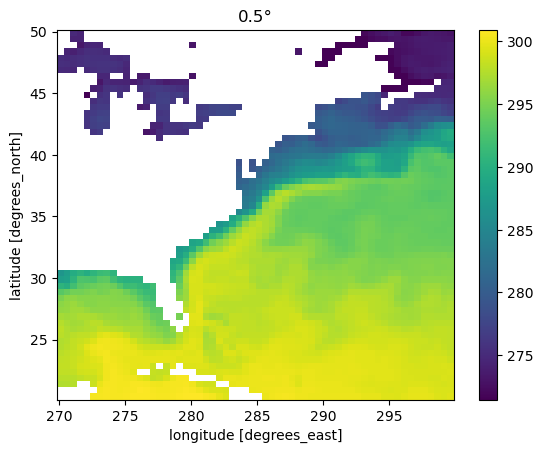

In [74]:
sst_2.plot()
plt.title("0.5°")
plt.savefig("/mnt/V/Master/figures/sst_0.5.png")

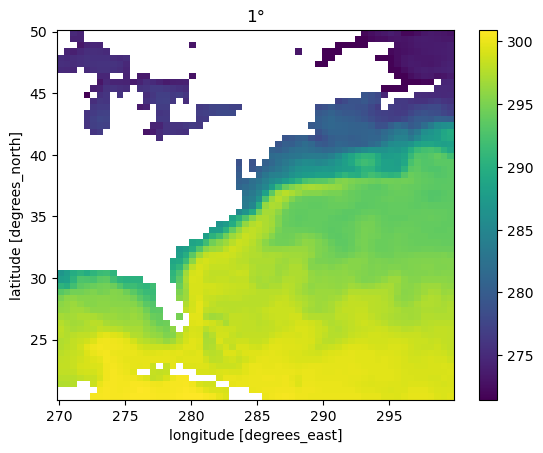

In [72]:
sst_4.plot()
plt.title("1°")
plt.savefig("/mnt/V/Master/figures/sst_1.png")

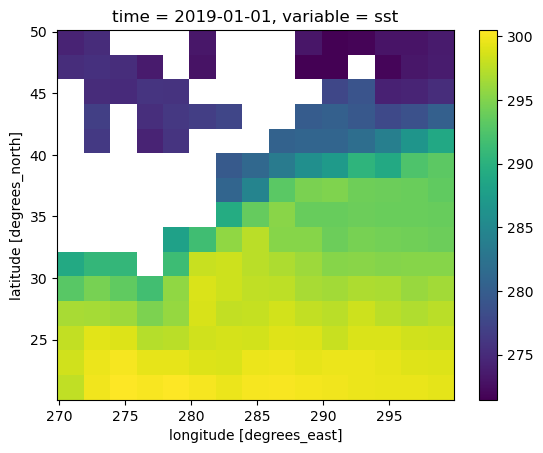

In [68]:
sst_8.plot()

In [2]:
template = cml.load_source("file", "/mnt/ssd2/Master/S2S_on_SFNO/inputs/ClimateInputData_202101010.grib")

In [3]:
dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_6_startDate_202101010_createdOn_20240122T1128/"
d_single = xr.open_dataset(dir+"leadtime_6_startDate_202101010_createdOn_20240122T1128_step_6.nc")

In [30]:
#d_single.info()

In [2]:
# dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_202101010_createdOn_20240122T1306/"
# dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_202101010_createdOn_20240122T1349/"
dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_201901010_createdOn_20240123T0009/"
 
d_multiple = xr.open_mfdataset(dir+"*")

/opt/conda/envs/model/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [31]:
#d_multiple.info()

In [6]:
dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_202101010_createdOn_20240122T1129/"
d_multiple_1 = xr.open_dataset(dir+"leadtime_18_startDate_202101010_createdOn_20240122T1129_step_6.nc")
d_multiple_2 = xr.open_dataset(dir+"leadtime_18_startDate_202101010_createdOn_20240122T1129_step_12.nc")

In [32]:
#d_multiple_1.info()

In [33]:
#d_multiple_2.info()

In [3]:
# dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_202101010_createdOn_20240122T1153.grib"
# dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_202101010_createdOn_20240122T1349.grib"
dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_18_startDate_201901010_createdOn_20240123T0009.grib"

d_grib = xr.open_dataset(dir)

skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/opt/conda/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/conda/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/opt/conda/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/conda/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is diff

In [14]:
g_data = d_grib.as_numpy()

In [5]:
d_multiple["10u"].plot.pcolormesh()

ValueError: DataArray must be 2d

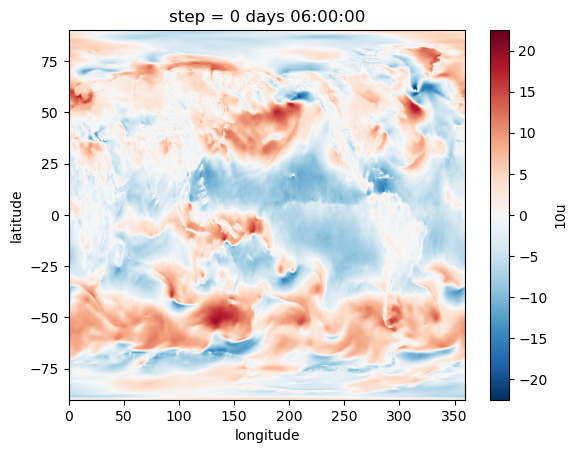

In [16]:
d_multiplec.plot()

In [7]:
d_multiple["10u"].shape

(3, 721, 1440)

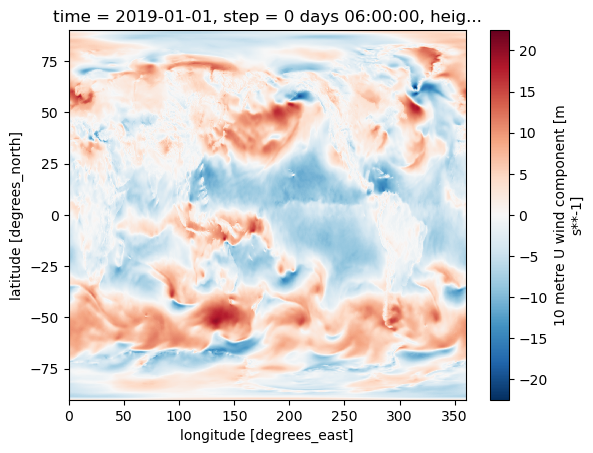

In [17]:
d_grib["u10"][0].plot()

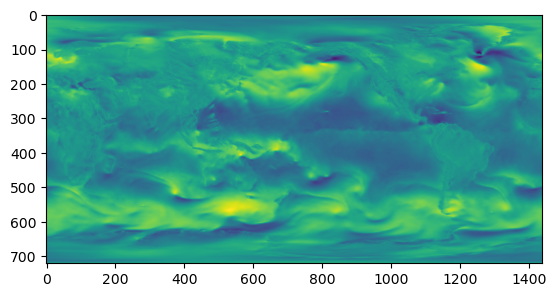

In [24]:
plt.imshow(d_multiple["10u"][0].to_numpy())

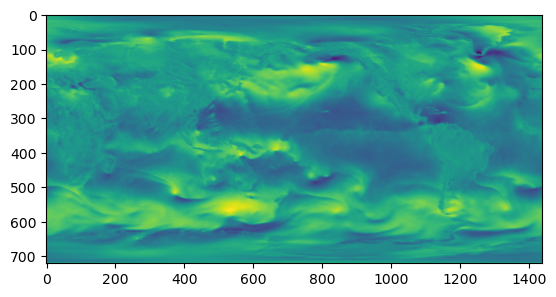

In [23]:
plt.imshow(d_grib["u10"][0].to_numpy())

In [26]:
np.equal(d_multiple["10u"][0].to_numpy(),d_grib["u10"][0].to_numpy())

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [27]:
u10_d = d_multiple["10u"][0].to_numpy()
u10_g = d_grib["u10"][0].to_numpy()

In [29]:
u10_d

array([[-0.5420187 , -0.5420187 , -0.5420187 , ..., -0.5420187 ,
        -0.5420187 , -0.5420187 ],
       [ 1.1225822 ,  1.1117611 ,  1.0995553 , ...,  1.1707785 ,
         1.1631144 ,  1.1378256 ],
       [ 1.6668972 ,  1.6554121 ,  1.640817  , ...,  1.7257767 ,
         1.704918  ,  1.6843024 ],
       ...,
       [-1.8212001 , -1.8226908 , -1.8272451 , ..., -1.8191159 ,
        -1.8191773 , -1.8231453 ],
       [-0.9732318 , -0.9787744 , -0.9790549 , ..., -0.9775424 ,
        -0.97203887, -0.9726319 ],
       [ 2.0715568 ,  2.0715568 ,  2.0715568 , ...,  2.0715568 ,
         2.0715568 ,  2.0715568 ]], dtype=float32)

In [28]:
u10_g

array([[-0.54214096, -0.54214096, -0.54214096, ..., -0.54214096,
        -0.54214096, -0.54214096],
       [ 1.1228981 ,  1.1121559 ,  1.0994606 , ...,  1.1707497 ,
         1.1629372 ,  1.1375465 ],
       [ 1.6668434 ,  1.6551247 ,  1.6404762 , ...,  1.7254372 ,
         1.7049294 ,  1.6844215 ],
       ...,
       [-1.8214378 , -1.8224144 , -1.8272972 , ..., -1.8194847 ,
        -1.8194847 , -1.823391  ],
       [-0.972805  , -0.9786644 , -0.9786644 , ..., -0.97768784,
        -0.97182846, -0.972805  ],
       [ 2.0711403 ,  2.0711403 ,  2.0711403 , ...,  2.0711403 ,
         2.0711403 ,  2.0711403 ]], dtype=float32)

In [76]:

import matplotlib as mpl
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [75]:
u10_d.plot()


ImportError: matplotlib is required for plot.utils.get_axis

In [35]:
np.array_equal(np.round(u10_d,0),np.round(u10_g,0))

False

In [58]:
np.array_equal(u10_d,u10_g)

False

In [69]:
u10_d[0,100,100]

-1.4233345

In [68]:
u10_d[0,0,0] 

-1.083533

In [70]:
u10_g[0,100,100]

-1.4236221

In [49]:
a2 = np.round(u10_g,1)
a1 = np.round(u10_d,1)
mask = (a1==a2)

In [50]:
inv_mask = np.invert(mask)
np.sum(inv_mask)

7842

In [47]:
u10_g[inv_mask]

array([-3.249794 ,  4.5500107, -0.249794 , ...,  3.750124 ,  6.4503193,
        7.0499287], dtype=float32)

In [ ]:
u10_g[inv_mask]

In [48]:
u10_d[inv_mask]

array([-3.2500076 ,  4.549981  , -0.25022367, ...,  3.7497847 ,
        6.449904  ,  7.0502706 ], dtype=float32)

In [7]:
nansTrue = xr.open_dataset('/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/6hr_allfields_nansTrue.grib',engine="cfgrib")

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==131 shortName='u'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildErro

In [8]:
nansTrue

<xarray.Dataset>
Dimensions:            (latitude: 721, longitude: 1440, isobaricInhPa: 3)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         datetime64[ns] ...
    surface            float64 ...
    meanSea            float64 ...
  * isobaricInhPa      (isobaricInhPa) float64 850.0 500.0 250.0
    entireAtmosphere   float64 ...
Data variables:
    u10                (latitude, longitude) float32 ...
    v10                (latitude, longitude) float32 ...
    sp                 (latitude, longitude) float32 ...
    msl                (latitude, longitude) float32 ...
    t                  (isobaricInhPa, latitude, longitude) float32 ...
    tcwv               (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-01-16T16:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
newgdata = xr.open_dataset('/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/leadtime_6_startDate_202101010_createdOn_20240115T21010.grib',engine="cfgrib")

Can't create file '/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/leadtime_6_startDate_202101010_createdOn_20240115T21010.grib.923a8.idx'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 535, in from_indexpath_or_filestream
    self = cls.from_fieldset(filestream, index_keys, computed_keys)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 378, in from_fieldset
    return cls.from_fieldset_and_iteritems(fieldset, iteritems, index_keys, computed_keys)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 391, in from_fieldset_and_iteritems
    for field_id, raw_field in iteritems:
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/m

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/leadtime_6_startDate_202101010_createdOn_20240115T21010.grib'

In [24]:
newgdata_1 = xr.open_dataset('/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/leadtime_6_startDate_202101010_createdOn_20240115T2113.grib',engine="cfgrib")

In [18]:
newgdata.to_array().to_numpy().shape

(1, 721, 1440)

In [25]:
newgdata_1.to_array().to_numpy().shape

(1, 721, 1440)

In [19]:
k = newgdata.to_array().to_numpy()

In [20]:
np.isnan(np.sum(k))

False

In [26]:
t = newgdata_1.to_array().to_numpy()
np.isnan(np.sum(t))

False

In [27]:
t

array([[[ -0.38897133,  -0.46709633,  -0.46709633, ...,  -0.22490883,
          -0.23272133,  -0.16436195],
        [ -6.9114323 ,  -7.0403385 ,  -7.063776  , ...,  -7.4573307 ,
          -7.418268  ,  -7.336237  ],
        [ -6.9827213 ,  -7.023737  ,  -7.1565495 , ...,  -7.512995  ,
          -7.503229  ,  -7.447565  ],
        ...,
        [ -3.4182682 ,  -3.4153385 ,  -3.4426823 , ...,  -3.3723698 ,
          -3.2161198 ,  -3.2014713 ],
        [ -3.266901  ,  -3.2727604 ,  -3.3010807 , ...,  -3.2844791 ,
          -3.1379948 ,  -2.9290104 ],
        [-19.288385  , -19.288385  , -19.288385  , ..., -19.288385  ,
         -19.288385  , -19.288385  ]]], dtype=float32)

In [4]:
newdata = xr.open_dataset('/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_120_startDate_202101010_createdOn_20240115T1416.grib')

Can't create file '/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_120_startDate_202101010_createdOn_20240115T1416.grib.923a8.idx'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 535, in from_indexpath_or_filestream
    self = cls.from_fieldset(filestream, index_keys, computed_keys)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 378, in from_fieldset
    return cls.from_fieldset_and_iteritems(fieldset, iteritems, index_keys, computed_keys)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/messages.py", line 391, in from_fieldset_and_iteritems
    for field_id, raw_field in iteritems:
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/message

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/leadtime_120_startDate_202101010_createdOn_20240115T1416.grib'

In [7]:
newdata

<xarray.Dataset>
Dimensions:            (step: 20, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 5 days 00:0...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         (step) datetime64[ns] ...
    surface            float64 ...
    meanSea            float64 ...
    entireAtmosphere   float64 ...
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables:
    u10                (step, latitude, longitude) float32 ...
    v10                (step, latitude, longitude) float32 ...
    sp                 (step, latitude, longitude) float32 ...
    msl                (step, latitude, longitude) float32 ...
    tcwv               (step, latitude, longitude) float32 ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 ...
    r                  (step, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-01-15T14:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
data = xr.open_mfdataset(dir+"*")

In [6]:
data.info()

xarray.Dataset {
dimensions:
	number = 1 ;
	time = 1 ;
	step = 20 ;
	surface = 1 ;
	latitude = 721 ;
	longitude = 1440 ;
	isobaricInhPa = 13 ;

variables:
	float32 u10(number, time, step, surface, latitude, longitude) ;
		u10:GRIB_paramId = 165 ;
		u10:GRIB_dataType = an ;
		u10:GRIB_numberOfPoints = 1038240 ;
		u10:GRIB_typeOfLevel = surface ;
		u10:GRIB_stepUnits = 1 ;
		u10:GRIB_stepType = instant ;
		u10:GRIB_gridType = regular_ll ;
		u10:GRIB_NV = 0 ;
		u10:GRIB_Nx = 1440 ;
		u10:GRIB_Ny = 721 ;
		u10:GRIB_cfName = unknown ;
		u10:GRIB_cfVarName = u10 ;
		u10:GRIB_gridDefinitionDescription = Latitude/Longitude Grid ;
		u10:GRIB_iDirectionIncrementInDegrees = 0.25 ;
		u10:GRIB_iScansNegatively = 0 ;
		u10:GRIB_jDirectionIncrementInDegrees = 0.25 ;
		u10:GRIB_jPointsAreConsecutive = 0 ;
		u10:GRIB_jScansPositively = 0 ;
		u10:GRIB_latitudeOfFirstGridPointInDegrees = 90.0 ;
		u10:GRIB_latitudeOfLastGridPointInDegrees = -90.0 ;
		u10:GRIB_longitudeOfFirstGridPointInDegrees = 0.0 ;
		u

In [10]:
newdata.coords

Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 5 days 00:0...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         (step) datetime64[ns] ...
    surface            float64 ...
    meanSea            float64 ...
    entireAtmosphere   float64 ...
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0

In [12]:
newdata["u10"].coords

Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 0 days 06:00:00 ... 5 days 00:0...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         (step) datetime64[ns] ...
    surface            float64 ...
    meanSea            float64 ...
    entireAtmosphere   float64 ...

In [4]:
dirg = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/sfno/"

gdata = xr.open_dataset(dirg+"leadtime_120_startDate_202101010_createdOn_20240115T1223.grib.grib")

skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.Data

In [52]:
gdata2 = xr.open_dataset(dirg+"leadtime_120_startDate_202101010_createdOn_20240115T1223.grib")

skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.Data

In [9]:
du10 = data["u10"].to_numpy()

In [16]:
du10 = du10.squeeze()
du10.shape

(20, 721, 1440)

In [54]:
gu10 = gdata["u10"].to_numpy()

In [14]:
gu10.shape

(20, 721, 1440)

In [17]:
np.array_equal(du10,gu10)

False

In [18]:
du10

array([[[-1.083533  , -1.083533  , -1.083533  , ..., -1.083533  ,
         -1.083533  , -1.083533  ],
        [-4.902228  , -4.8904505 , -4.868965  , ..., -4.9458427 ,
         -4.9245863 , -4.926977  ],
        [-5.6167903 , -5.5893126 , -5.5540485 , ..., -5.6807246 ,
         -5.667745  , -5.6355624 ],
        ...,
        [-1.820684  , -1.816051  , -1.8190523 , ..., -1.8146545 ,
         -1.8144335 , -1.8214394 ],
        [-1.1536719 , -1.1472374 , -1.1498419 , ..., -1.1511095 ,
         -1.1517631 , -1.1554921 ],
        [ 1.9931746 ,  1.9931746 ,  1.9931746 , ...,  1.9931746 ,
          1.9931746 ,  1.9931746 ]],

       [[-1.0643024 , -1.0643024 , -1.0643024 , ..., -1.0643024 ,
         -1.0643024 , -1.0643024 ],
        [-4.4359026 , -4.4195523 , -4.4090667 , ..., -4.5048075 ,
         -4.47919   , -4.4613767 ],
        [-6.047192  , -6.0130844 , -5.9835596 , ..., -6.1080594 ,
         -6.082215  , -6.049476  ],
        ...,
        [ 0.92769134,  0.92735803,  0.9325366 , ...,  

In [55]:
gu10

array([[[-1.0788116 , -1.0788116 , -1.0788116 , ..., -1.0788116 ,
         -1.0788116 , -1.0788116 ],
        [-4.9049835 , -4.890335  , -4.886429  , ..., -4.945999  ,
         -4.919632  , -4.924515  ],
        [-5.6168976 , -5.5944366 , -5.555374  , ..., -5.664749  ,
         -5.6657257 , -5.645218  ],
        ...,
        [-1.8209991 , -1.8180695 , -1.8122101 , ..., -1.8151398 ,
         -1.8200226 , -1.8209991 ],
        [-1.1501007 , -1.1510773 , -1.1520538 , ..., -1.154007  ,
         -1.1501007 , -1.1481476 ],
        [ 1.9954071 ,  1.9954071 ,  1.9954071 , ...,  1.9954071 ,
          1.9954071 ,  1.9954071 ]],

       [[-1.0440674 , -1.0440674 , -1.0440674 , ..., -1.0440674 ,
         -1.0440674 , -1.0440674 ],
        [-4.437622  , -4.415161  , -4.404419  , ..., -4.5108643 ,
         -4.475708  , -4.4639893 ],
        [-6.045044  , -6.0264893 , -5.984497  , ..., -6.100708  ,
         -6.0821533 , -6.0684814 ],
        ...,
        [ 0.9256592 ,  0.93444824,  0.93933105, ...,  

In [56]:
gdata["u10"].sel(step=[np.timedelta64(2*60*60*10**9, 'ns')]).to_numpy()

KeyError: "not all values found in index 'step'"

In [58]:
gdata["u10"].sel(step='6:0:0').to_numpy()

array([[-1.0788116, -1.0788116, -1.0788116, ..., -1.0788116, -1.0788116,
        -1.0788116],
       [-4.9049835, -4.890335 , -4.886429 , ..., -4.945999 , -4.919632 ,
        -4.924515 ],
       [-5.6168976, -5.5944366, -5.555374 , ..., -5.664749 , -5.6657257,
        -5.645218 ],
       ...,
       [-1.8209991, -1.8180695, -1.8122101, ..., -1.8151398, -1.8200226,
        -1.8209991],
       [-1.1501007, -1.1510773, -1.1520538, ..., -1.154007 , -1.1501007,
        -1.1481476],
       [ 1.9954071,  1.9954071,  1.9954071, ...,  1.9954071,  1.9954071,
         1.9954071]], dtype=float32)

In [36]:
gdata2["u10"].sel(step='6:0:0').to_numpy()

array([[-1.0837784, -1.0837784, -1.0837784, ..., -1.0837784, -1.0837784,
        -1.0837784],
       [-4.9021378, -4.890419 , -4.8689346, ..., -4.946083 , -4.9245987,
        -4.926552 ],
       [-5.6169815, -5.5896378, -5.5544815, ..., -5.680458 , -5.6677628,
        -5.635536 ],
       ...,
       [-1.8210831, -1.8162003, -1.81913  , ..., -1.8142471, -1.8142471,
        -1.8210831],
       [-1.1540909, -1.147255 , -1.1501846, ..., -1.1511612, -1.1521378,
        -1.1550674],
       [ 1.99337  ,  1.99337  ,  1.99337  , ...,  1.99337  ,  1.99337  ,
         1.99337  ]], dtype=float32)

In [33]:
data["u10"].sel(step="6:0:0").to_numpy()

array([[[[[-1.083533 , -1.083533 , -1.083533 , ..., -1.083533 ,
           -1.083533 , -1.083533 ],
          [-4.902228 , -4.8904505, -4.868965 , ..., -4.9458427,
           -4.9245863, -4.926977 ],
          [-5.6167903, -5.5893126, -5.5540485, ..., -5.6807246,
           -5.667745 , -5.6355624],
          ...,
          [-1.820684 , -1.816051 , -1.8190523, ..., -1.8146545,
           -1.8144335, -1.8214394],
          [-1.1536719, -1.1472374, -1.1498419, ..., -1.1511095,
           -1.1517631, -1.1554921],
          [ 1.9931746,  1.9931746,  1.9931746, ...,  1.9931746,
            1.9931746,  1.9931746]]]]], dtype=float32)

In [39]:
np.array_equal(gu10.round(2),du10.round(2))

False

In [41]:
mask = gu10.round(2) == du10.round(2)


In [46]:
mask

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True, False, ...,  True,  True, False],
        [ True,  True, False, ..., False,  True, False],
        ...,
        [ True,  True, False, ..., False, False,  True],
        [ True,  True,  True, ...,  True,  True, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [ True,  True, False, ..., False,  True,  True],
        [ True, False,  True, ..., False,  True, False],
        ...,
        [ True,  True, False, ..., False, False,  True],
        [ True, False, False, ..., False,  True, False],
        [False, False, False, ..., False, False, False]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True, False,  True, ...,  True, False, False],
        [False,  True,  True, ..., False, False, False],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [False, False,  True, ..., False,  Tr

In [48]:
gu10[np.invert(mask)]

array([-4.886429 , -4.8336945, -4.789749 , ...,  4.180626 ,  4.180626 ,
        4.180626 ], dtype=float32)

In [49]:
du10[np.invert(mask)]

array([-4.868965 , -4.8415394, -4.7999682, ...,  4.1634617,  4.1634617,
        4.1634617], dtype=float32)

In [45]:
du10.round(2)

array([[[-1.08, -1.08, -1.08, ..., -1.08, -1.08, -1.08],
        [-4.9 , -4.89, -4.87, ..., -4.95, -4.92, -4.93],
        [-5.62, -5.59, -5.55, ..., -5.68, -5.67, -5.64],
        ...,
        [-1.82, -1.82, -1.82, ..., -1.81, -1.81, -1.82],
        [-1.15, -1.15, -1.15, ..., -1.15, -1.15, -1.16],
        [ 1.99,  1.99,  1.99, ...,  1.99,  1.99,  1.99]],

       [[-1.06, -1.06, -1.06, ..., -1.06, -1.06, -1.06],
        [-4.44, -4.42, -4.41, ..., -4.5 , -4.48, -4.46],
        [-6.05, -6.01, -5.98, ..., -6.11, -6.08, -6.05],
        ...,
        [ 0.93,  0.93,  0.93, ...,  0.94,  0.94,  0.93],
        [ 2.21,  2.22,  2.21, ...,  2.2 ,  2.21,  2.21],
        [ 4.9 ,  4.9 ,  4.9 , ...,  4.9 ,  4.9 ,  4.9 ]],

       [[-1.05, -1.05, -1.05, ..., -1.05, -1.05, -1.05],
        [-4.47, -4.45, -4.44, ..., -4.52, -4.49, -4.48],
        [-6.53, -6.51, -6.5 , ..., -6.59, -6.56, -6.55],
        ...,
        [ 2.05,  2.05,  2.05, ...,  2.05,  2.05,  2.05],
        [ 3.58,  3.59,  3.58, ...,  3.58,  3.

In [50]:
data.to_netcdf(dirg+"combinded.nc")

In [51]:
20*300

6000

In [66]:
dir = "/mnt/ssd2/Master/S2S_on_SFNO/outputs/fourcastnet/"
four = xr.open_dataset(dir+"leadtime_120_startDate_202101010_createdOn_20240115T1325.grib")

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==131 shortName='u'
Traceback (most recent call last):
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/lenny/miniconda3/envs/model/lib/python3.11/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildErro

In [67]:
four.info()

xarray.Dataset {
dimensions:
	step = 20 ;
	latitude = 721 ;
	longitude = 1440 ;
	isobaricInhPa = 3 ;

variables:
	datetime64[ns] time() ;
		time:long_name = initial time of forecast ;
		time:standard_name = forecast_reference_time ;
	timedelta64[ns] step(step) ;
		step:long_name = time since forecast_reference_time ;
		step:standard_name = forecast_period ;
	float64 heightAboveGround() ;
		heightAboveGround:long_name = height above the surface ;
		heightAboveGround:units = m ;
		heightAboveGround:positive = up ;
		heightAboveGround:standard_name = height ;
	float64 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:stored_direction = decreasing ;
	float64 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
	datetime64[ns] valid_time(step) ;
		valid_time:standard_name = time ;
		valid_time:long_name = time ;
	float32 u1

In [68]:
for k in four:
    print(k)



u10
v10
sp
msl
t
tcwv
